In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Meter A
Contains 87 instances of physical diagnostic parameters for an 8-path liquid USM. It
has 37 attributes(features) and 2 classes or health states: \
(1) -- Flatness ratio \
(2) -- Symmetry \
(3) -- Crossflow \
(4)-(11) -- Flow velocity in each of the eight paths \
(12)-(19) -- Speed of sound in each of the eight paths \
(20) -- Average speed of sound in all eight paths \
(21)-(36) -- Gain at both ends of each of the eight paths \
(37) -- Class attribute or health state of meter: 1,2 \
Class '1' - Healthy \
Class '2' - Installation effects 

In [5]:
meter_a_df = pd.read_csv("./dataset/Meter A", sep="\t", header=None)
meter_a_headers = ['Flatness Ratio',
                      'Symmetry',
                      'Crossflow',
                      'Flow Velocity 1',
                      'Flow Velocity 2',
                      'Flow Velocity 3',
                      'Flow Velocity 4',
                      'Flow Velocity 5',
                      'Flow Velocity 6',
                      'Flow Velocity 7',
                      'Flow Velocity 8',
                      'Speed of Sound 1',
                      'Speed of Sound 2',
                      'Speed of Sound 3',
                      'Speed of Sound 4',
                      'Speed of Sound 5',
                      'Speed of Sound 6',
                      'Speed of Sound 7',
                      'Speed of Sound 8',
                      'Average Speed of Sound',
                      'Gain at both ends 1',
                      'Gain at both ends 2',
                      'Gain at both ends 3',
                      'Gain at both ends 4',
                      'Gain at both ends 5',
                      'Gain at both ends 6',
                      'Gain at both ends 7',
                      'Gain at both ends 8',
                      'Gain at both ends 9',
                      'Gain at both ends 10',
                      'Gain at both ends 11',
                      'Gain at both ends 12',
                      'Gain at both ends 13',
                      'Gain at both ends 14',
                      'Gain at both ends 15',
                      'Gain at both ends 16',
                      'Class Attribute/Health State']
meter_a_df.columns = meter_a_headers
# velocity = meter_a_df.loc[: , 'Flow Velocity 1':'Flow Velocity 8']
# gain = meter_a_df.loc[: , 'Gain at both ends 1':'Gain at both ends 15']
# meter_a_df['Average Velocity'] = velocity.mean(axis=1)
# meter_a_df['Average Gain at both ends'] = gain.mean(axis=1)
meter_a_df_x = meter_a_df.drop(['Class Attribute/Health State'], axis=1, inplace=False)
meter_a_df_y = meter_a_df[['Class Attribute/Health State']].copy()
meter_a_df_x
# meter_a_df_y
# meter_a_df


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Gain at both ends 7,Gain at both ends 8,Gain at both ends 9,Gain at both ends 10,Gain at both ends 11,Gain at both ends 12,Gain at both ends 13,Gain at both ends 14,Gain at both ends 15,Gain at both ends 16
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,34.375000,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,34.103190,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,33.917643,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,33.763022,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,33.754882,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,...,33.173827,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,...,33.175458,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,...,33.172200,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832
85,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,3.381779,...,33.190105,32.555338,33.774415,33.302410,36.640627,36.699218,35.859377,35.849610,33.816732,33.011067


#### Merging Datasets

In [6]:
meter_a_df = pd.read_csv("./dataset/Meter A", sep="\t", header=None)
meter_a_headers = ['Flatness Ratio',
                      'Symmetry',
                      'Crossflow',
                      'Flow Velocity 1',
                      'Flow Velocity 2',
                      'Flow Velocity 3',
                      'Flow Velocity 4',
                      'Flow Velocity 5',
                      'Flow Velocity 6',
                      'Flow Velocity 7',
                      'Flow Velocity 8',
                      'Speed of Sound 1',
                      'Speed of Sound 2',
                      'Speed of Sound 3',
                      'Speed of Sound 4',
                      'Speed of Sound 5',
                      'Speed of Sound 6',
                      'Speed of Sound 7',
                      'Speed of Sound 8',
                      'Average Speed of Sound',
                      'Gain at both ends 1',
                      'Gain at both ends 2',
                      'Gain at both ends 3',
                      'Gain at both ends 4',
                      'Gain at both ends 5',
                      'Gain at both ends 6',
                      'Gain at both ends 7',
                      'Gain at both ends 8',
                      'Gain at both ends 9',
                      'Gain at both ends 10',
                      'Gain at both ends 11',
                      'Gain at both ends 12',
                      'Gain at both ends 13',
                      'Gain at both ends 14',
                      'Gain at both ends 15',
                      'Gain at both ends 16',
                      'Class Attribute/Health State']
meter_a_df.columns = meter_a_headers
meter_a_df.loc[meter_a_df['Class Attribute/Health State'] == 2, 'Class Attribute/Health State'] = 3         # change label 2 to 3, for common class label across all datasets
# velocity = meter_a_df.loc[: , 'Flow Velocity 1':'Flow Velocity 8']
# gain = meter_a_df.loc[: , 'Gain at both ends 1':'Gain at both ends 15']
# meter_a_df['Average Velocity'] = velocity.mean(axis=1)
# meter_a_df['Average Gain at both ends'] = gain.mean(axis=1)
meter_a_df_x = meter_a_df.drop(['Class Attribute/Health State'], axis=1, inplace=False)
meter_a_df_y = meter_a_df[['Class Attribute/Health State']].copy()

meter_b_df = pd.read_csv("./dataset/Meter B", sep="\t", header=None)
meter_b_headers = [
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Swirl Angle',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Average flow velocity in all four paths',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Average Speed of Sound',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Turbulence 1',
    'Turbulence 2',
    'Turbulence 3',
    'Turbulence 4',
    'Meter Performance',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class Attribute/Health State'
]
meter_b_df.columns = meter_b_headers
meter_a_df.loc[meter_a_df['Class Attribute/Health State'] == 3, 'Class Attribute/Health State'] = 4         # change label 3 to 4, for common class label across all datasets
meter_b_df_x = meter_b_df.drop(meter_b_df.columns[51], axis=1, inplace=False)
meter_b_df_y = meter_b_df[['Class Attribute/Health State']].copy()

meter_d_df = pd.read_csv("./dataset/Meter D", sep="\t", header=None)
meter_d_headers=[
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class Attribute/Health State'
]
meter_d_df.columns = meter_d_headers
meter_d_df_x = meter_d_df.drop(meter_d_df.columns[36], axis=1, inplace=False)
meter_d_df_y = meter_d_df[['Class Attribute/Health State']].copy()


In [7]:
print('Meter A class labels:', meter_a_df['Class Attribute/Health State'].unique())
print('Meter B class labels:', meter_b_df['Class Attribute/Health State'].unique())
print('Meter D class labels:', meter_d_df['Class Attribute/Health State'].unique())

Meter A class labels: [1 4]
Meter B class labels: [1 2 3]
Meter D class labels: [1 2 3 4]


### Unionize datasets of Meter A, B, and D.
Union of all datasets, and filling up missing columns with NaN values for further processing later on.

In [8]:
diff = meter_b_df.columns.difference(meter_a_df.columns)
print('Meter A missing columns from B:', diff.shape[0], diff.tolist())
# check for 
a = np.full(shape=(meter_a_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_a_full_df = pd.concat([meter_a_df, a], axis=1)
diff = meter_d_df.columns.difference(meter_a_full_df.columns)
print('New Meter A missing columns from D:', diff.shape[0], diff.tolist())
a = np.full(shape=(meter_a_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_a_full_df = pd.concat([meter_a_full_df, a], axis=1)
meter_a_full_df.shape


Meter A missing columns from B: 32 ['Average flow velocity in all four paths', 'Meter Performance', 'Profile Factor', 'Signal Quality 1', 'Signal Quality 2', 'Signal Quality 3', 'Signal Quality 4', 'Signal Quality 5', 'Signal Quality 6', 'Signal Quality 7', 'Signal Quality 8', 'Signal Strength 1', 'Signal Strength 2', 'Signal Strength 3', 'Signal Strength 4', 'Signal Strength 5', 'Signal Strength 6', 'Signal Strength 7', 'Signal Strength 8', 'Swirl Angle', 'Transit Time 1', 'Transit Time 2', 'Transit Time 3', 'Transit Time 4', 'Transit Time 5', 'Transit Time 6', 'Transit Time 7', 'Transit Time 8', 'Turbulence 1', 'Turbulence 2', 'Turbulence 3', 'Turbulence 4']
New Meter A missing columns from D: 0 []


(87, 69)

In [9]:
diff = meter_a_df.columns.difference(meter_b_df.columns)
print('Meter B missing columns from A:', diff.shape[0], diff.tolist())
# check for 
a = np.full(shape=(meter_b_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_b_full_df = pd.concat([meter_b_df, a], axis=1)
diff = meter_d_df.columns.difference(meter_b_full_df.columns)
print('New Meter B missing columns from D:', diff.shape[0], diff.tolist())
a = np.full(shape=(meter_b_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_b_full_df = pd.concat([meter_b_full_df, a], axis=1)
meter_b_full_df.shape


Meter B missing columns from A: 17 ['Flatness Ratio', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8', 'Gain at both ends 10', 'Gain at both ends 11', 'Gain at both ends 12', 'Gain at both ends 13', 'Gain at both ends 14', 'Gain at both ends 15', 'Gain at both ends 16', 'Gain at both ends 9', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8']
New Meter B missing columns from D: 0 []


(92, 69)

In [10]:
diff = meter_a_df.columns.difference(meter_d_df.columns)
print('Meter D missing columns from A:', diff.shape[0], diff.tolist())
# check for 
a = np.full(shape=(meter_d_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_d_full_df = pd.concat([meter_d_df, a], axis=1)
diff = meter_b_df.columns.difference(meter_d_full_df.columns)
print('New Meter D missing columns from B:', diff.shape[0], diff.tolist())
a = np.full(shape=(meter_d_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_d_full_df = pd.concat([meter_d_full_df, a], axis=1)
meter_d_full_df.shape


Meter D missing columns from A: 18 ['Average Speed of Sound', 'Flatness Ratio', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8', 'Gain at both ends 10', 'Gain at both ends 11', 'Gain at both ends 12', 'Gain at both ends 13', 'Gain at both ends 14', 'Gain at both ends 15', 'Gain at both ends 16', 'Gain at both ends 9', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8']
New Meter D missing columns from B: 7 ['Average flow velocity in all four paths', 'Meter Performance', 'Swirl Angle', 'Turbulence 1', 'Turbulence 2', 'Turbulence 3', 'Turbulence 4']


(180, 69)

Verification of common columns

In [11]:
# print(meter_a_df.columns, meter_b_df.columns, meter_d_df.columns)

common = np.intersect1d(np.intersect1d(meter_a_full_df.columns, meter_b_full_df.columns), meter_d_full_df.columns)
common.shape

(69,)

Combine Meter A, B, D datasets

In [12]:
full_df = pd.concat([pd.concat([meter_a_full_df, meter_b_full_df], ignore_index=True), meter_d_full_df], ignore_index=True)
print('Meter A rows and columns:', meter_a_full_df.shape)
print('Meter B rows and columns:', meter_b_full_df.shape)
print('Meter D rows and columns:', meter_d_full_df.shape)
full_df

Meter A rows and columns: (87, 69)
Meter B rows and columns: (92, 69)
Meter D rows and columns: (180, 69)


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,NaN,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,NaN,NaN,NaN,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,NaN,NaN,NaN,NaN
355,NaN,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,NaN,NaN,NaN,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,NaN,NaN,NaN,NaN
356,NaN,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,NaN,NaN,NaN,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,NaN,NaN,NaN,NaN
357,NaN,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,NaN,NaN,NaN,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,NaN,NaN,NaN,NaN


We see that with the union of datasets Meter A, B, and D, we will have a dataset of 359 rows and 69 attributes.

### Replace Missing Values using K Nearest Neighbours
Given that the datasets are all retrieved from a similar medium of Liquefied Natural Gas, and all have similar foundational properties retrieved, we use K Nearest Neighbours to fill up missing data, referencing from data that have features similar to the current missing one. \
Subsequently, if there are still zero values in the data, we will be replacing it with averages for a more accurate representation

In [13]:
missing_values = full_df.isnull().sum()
print('Total number of missing values:', sum(missing_values.tolist()))
print(missing_values)

from sklearn.impute import KNNImputer

impute_knn = KNNImputer(n_neighbors=2)
full_df_replaced = pd.DataFrame(impute_knn.fit_transform(full_df), columns=full_df.columns)

# replace zero values with average of column

full_df_replaced

Total number of missing values: 8848
Flatness Ratio     272
Symmetry             0
Crossflow            0
Flow Velocity 1      0
Flow Velocity 2      0
                  ... 
Transit Time 8      87
Turbulence 1       267
Turbulence 2       267
Turbulence 3       267
Turbulence 4       267
Length: 69, dtype: int64


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,0.000000
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,0.000000
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,0.000000
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,0.000000


In [14]:
count = (full_df_replaced == 0).sum()
print('Total number of zero values:', sum(count.tolist()))
print(count)
full_df_replaced=full_df_replaced.mask(full_df_replaced==0).fillna(full_df_replaced.mean())
print('\nAfter Replacement:')
full_df_replaced


Total number of zero values: 619
Flatness Ratio       0
Symmetry            15
Crossflow           15
Flow Velocity 1      0
Flow Velocity 2      0
                  ... 
Transit Time 8      15
Turbulence 1         0
Turbulence 2         0
Turbulence 3         0
Turbulence 4       195
Length: 69, dtype: int64

After Replacement:


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,6.485695
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,6.485695
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,6.485695
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,6.485695


### Recalculate Averages
As averages are precise numbers computed based on features of the current row, we can not simply replace averages. Therefore, these averages have to be recalculated.\
There are two attributes that takes in average, and these are:\
1. Average flow velocity in all paths
2. Average speed of sound in all paths

In [15]:
print(full_df_replaced.columns.tolist())

['Flatness Ratio', 'Symmetry', 'Crossflow', 'Flow Velocity 1', 'Flow Velocity 2', 'Flow Velocity 3', 'Flow Velocity 4', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8', 'Speed of Sound 1', 'Speed of Sound 2', 'Speed of Sound 3', 'Speed of Sound 4', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8', 'Average Speed of Sound', 'Gain at both ends 1', 'Gain at both ends 2', 'Gain at both ends 3', 'Gain at both ends 4', 'Gain at both ends 5', 'Gain at both ends 6', 'Gain at both ends 7', 'Gain at both ends 8', 'Gain at both ends 9', 'Gain at both ends 10', 'Gain at both ends 11', 'Gain at both ends 12', 'Gain at both ends 13', 'Gain at both ends 14', 'Gain at both ends 15', 'Gain at both ends 16', 'Class Attribute/Health State', 'Average flow velocity in all four paths', 'Meter Performance', 'Profile Factor', 'Signal Quality 1', 'Signal Quality 2', 'Signal Quality 3', 'Signal Quality 4', 'Signal Quality 5', 'Signal Quality 6', 'Signal Q

In [25]:
avg_velocity = full_df_replaced[['Flow Velocity 1', 'Flow Velocity 2', 'Flow Velocity 3', 'Flow Velocity 4', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8']]
average_speed = full_df_replaced[['Speed of Sound 1', 'Speed of Sound 2', 'Speed of Sound 3', 'Speed of Sound 4', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8']]
full_df_replaced['Average Velocity'] = avg_velocity.mean(axis=1)
full_df_replaced['Average Gain at both ends'] = average_speed.mean(axis=1)

### Find Correlation between features

Check for any relation within columns, if there is a direct relation, choose one and remove the other\
We first get an absolute value of correlation, as we are interested in eliminating both strongly negative and positive correlations

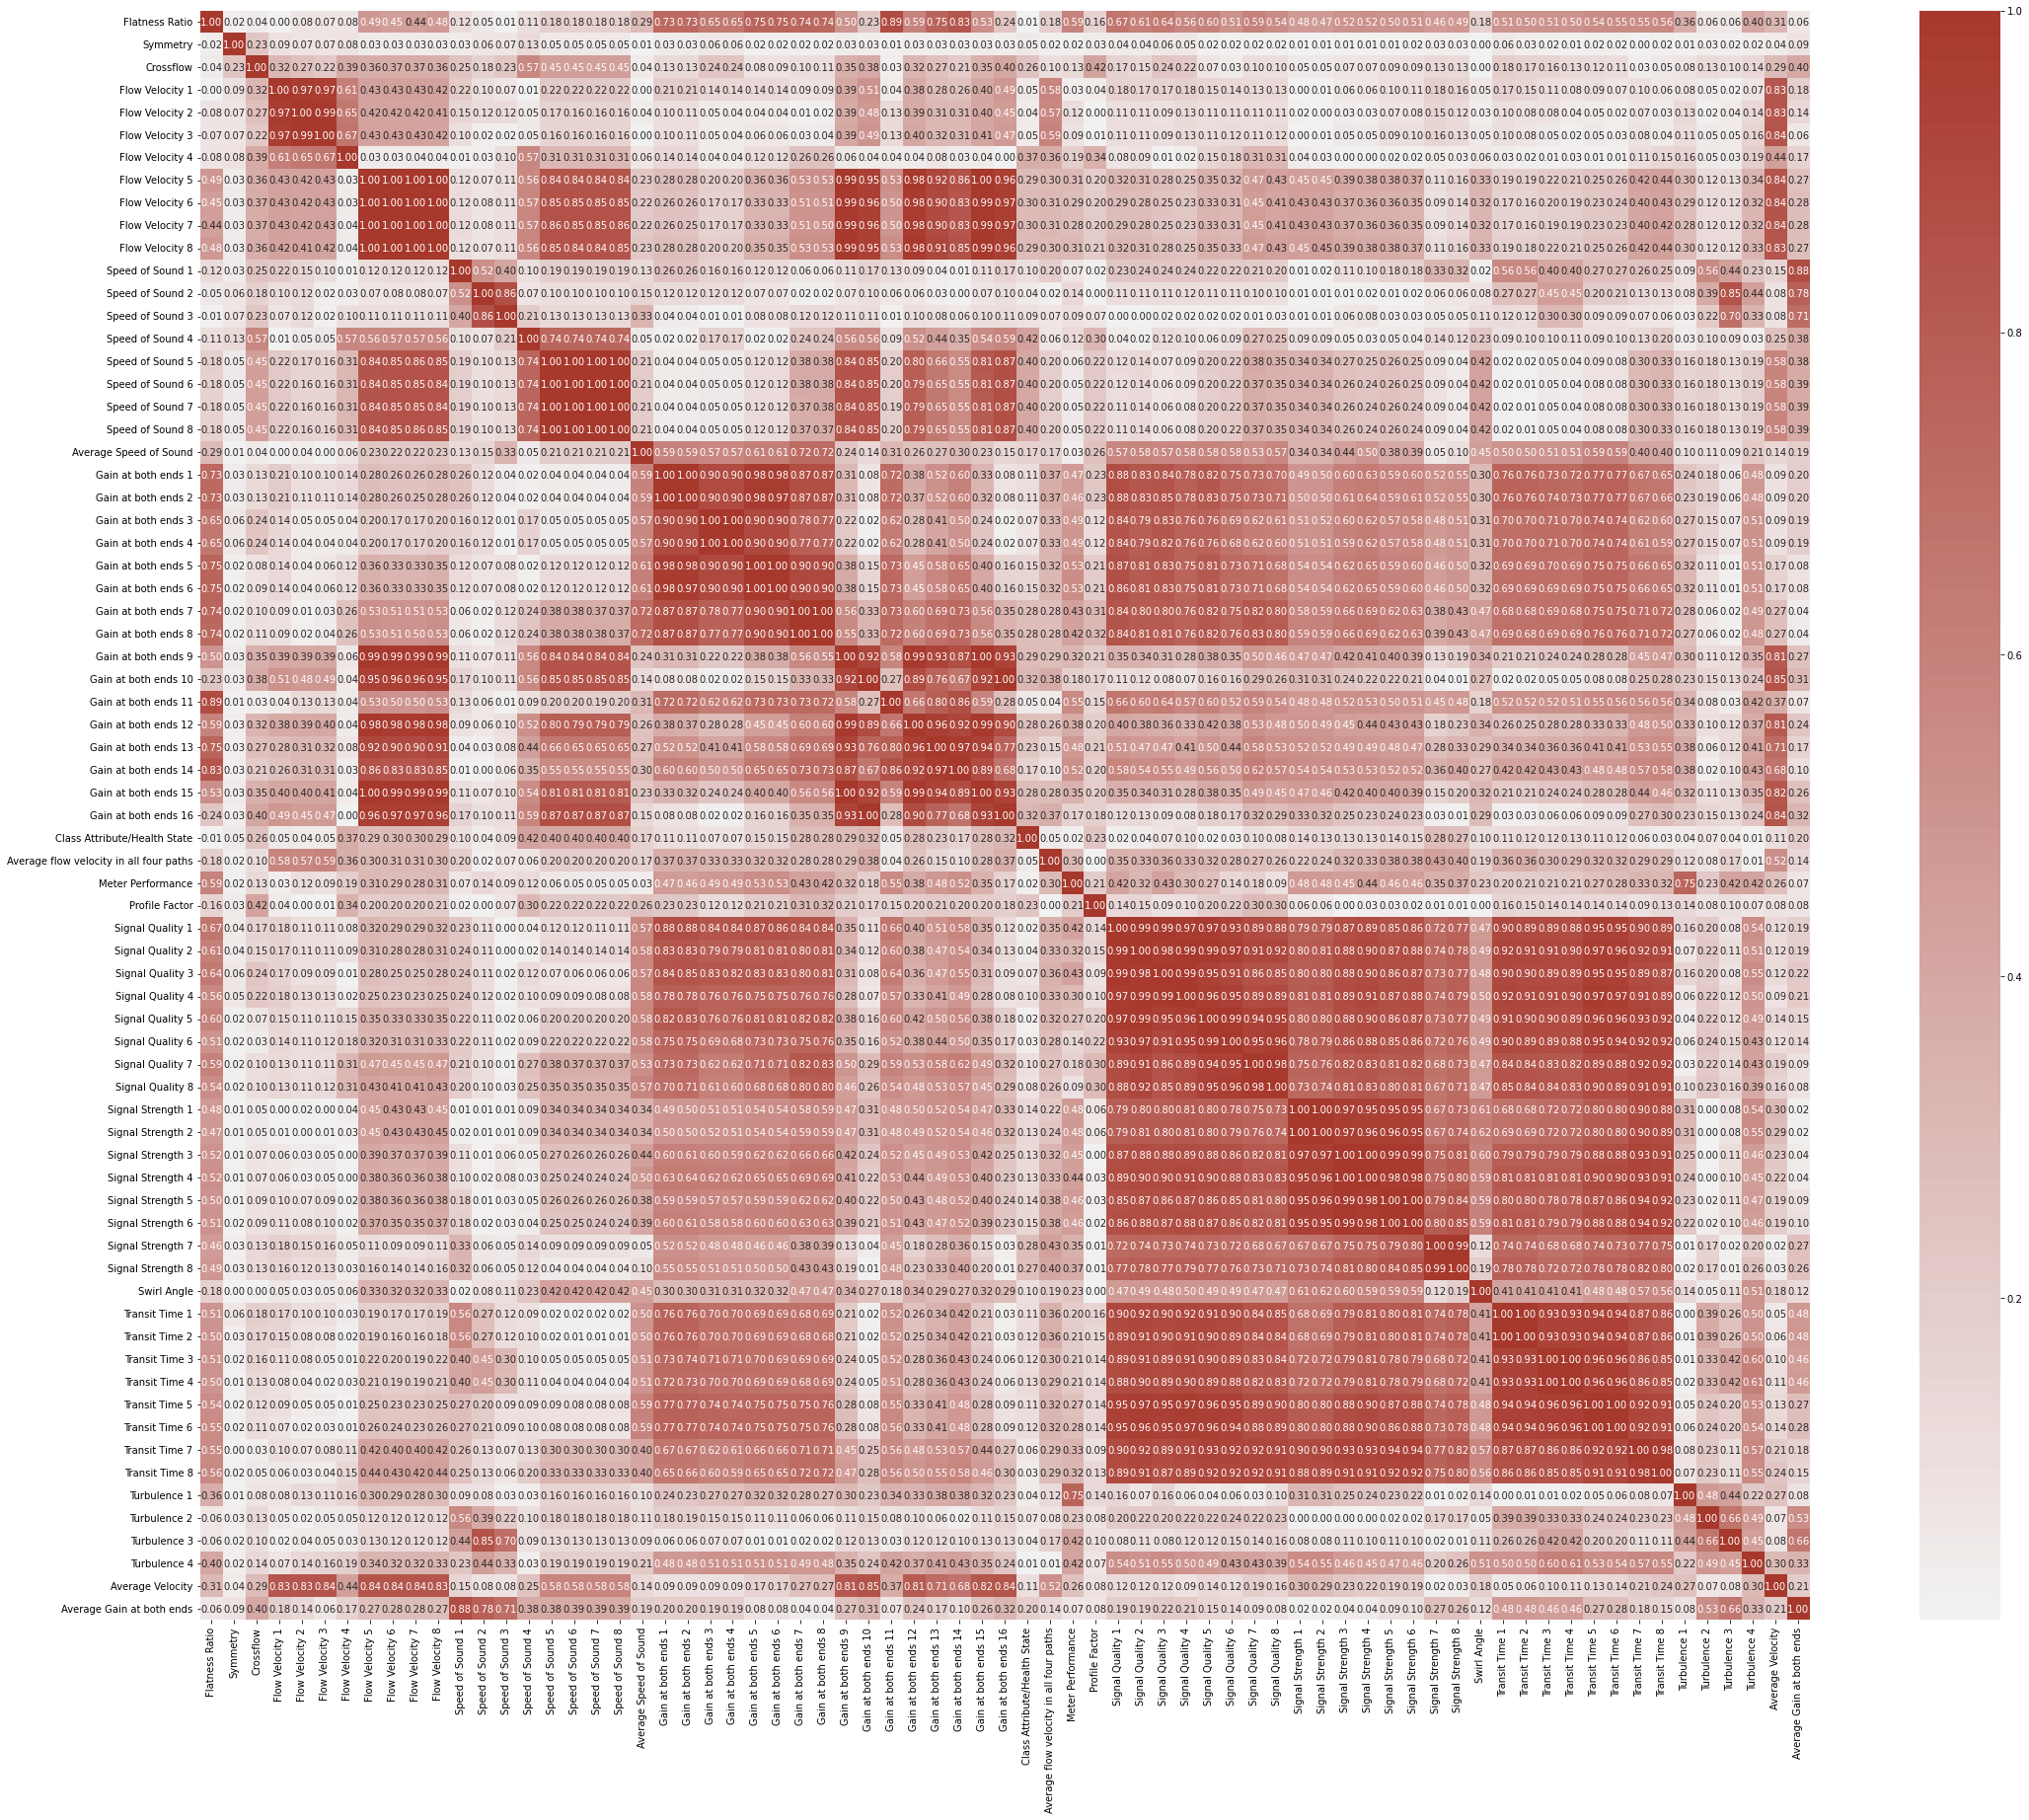

In [42]:
import seaborn as sns

full_corr_matrix = full_df_replaced.corr().abs()

plt.figure(figsize=(40,30))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(full_corr_matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)


See that the two halves are identical. \
To get a more focused and better view of the matrix, we take only the first half, as both halfs are symmetrical. \
Using the mask method, the other half is filled with NaN values, and prevents unecessary computation as these sides are duplicates

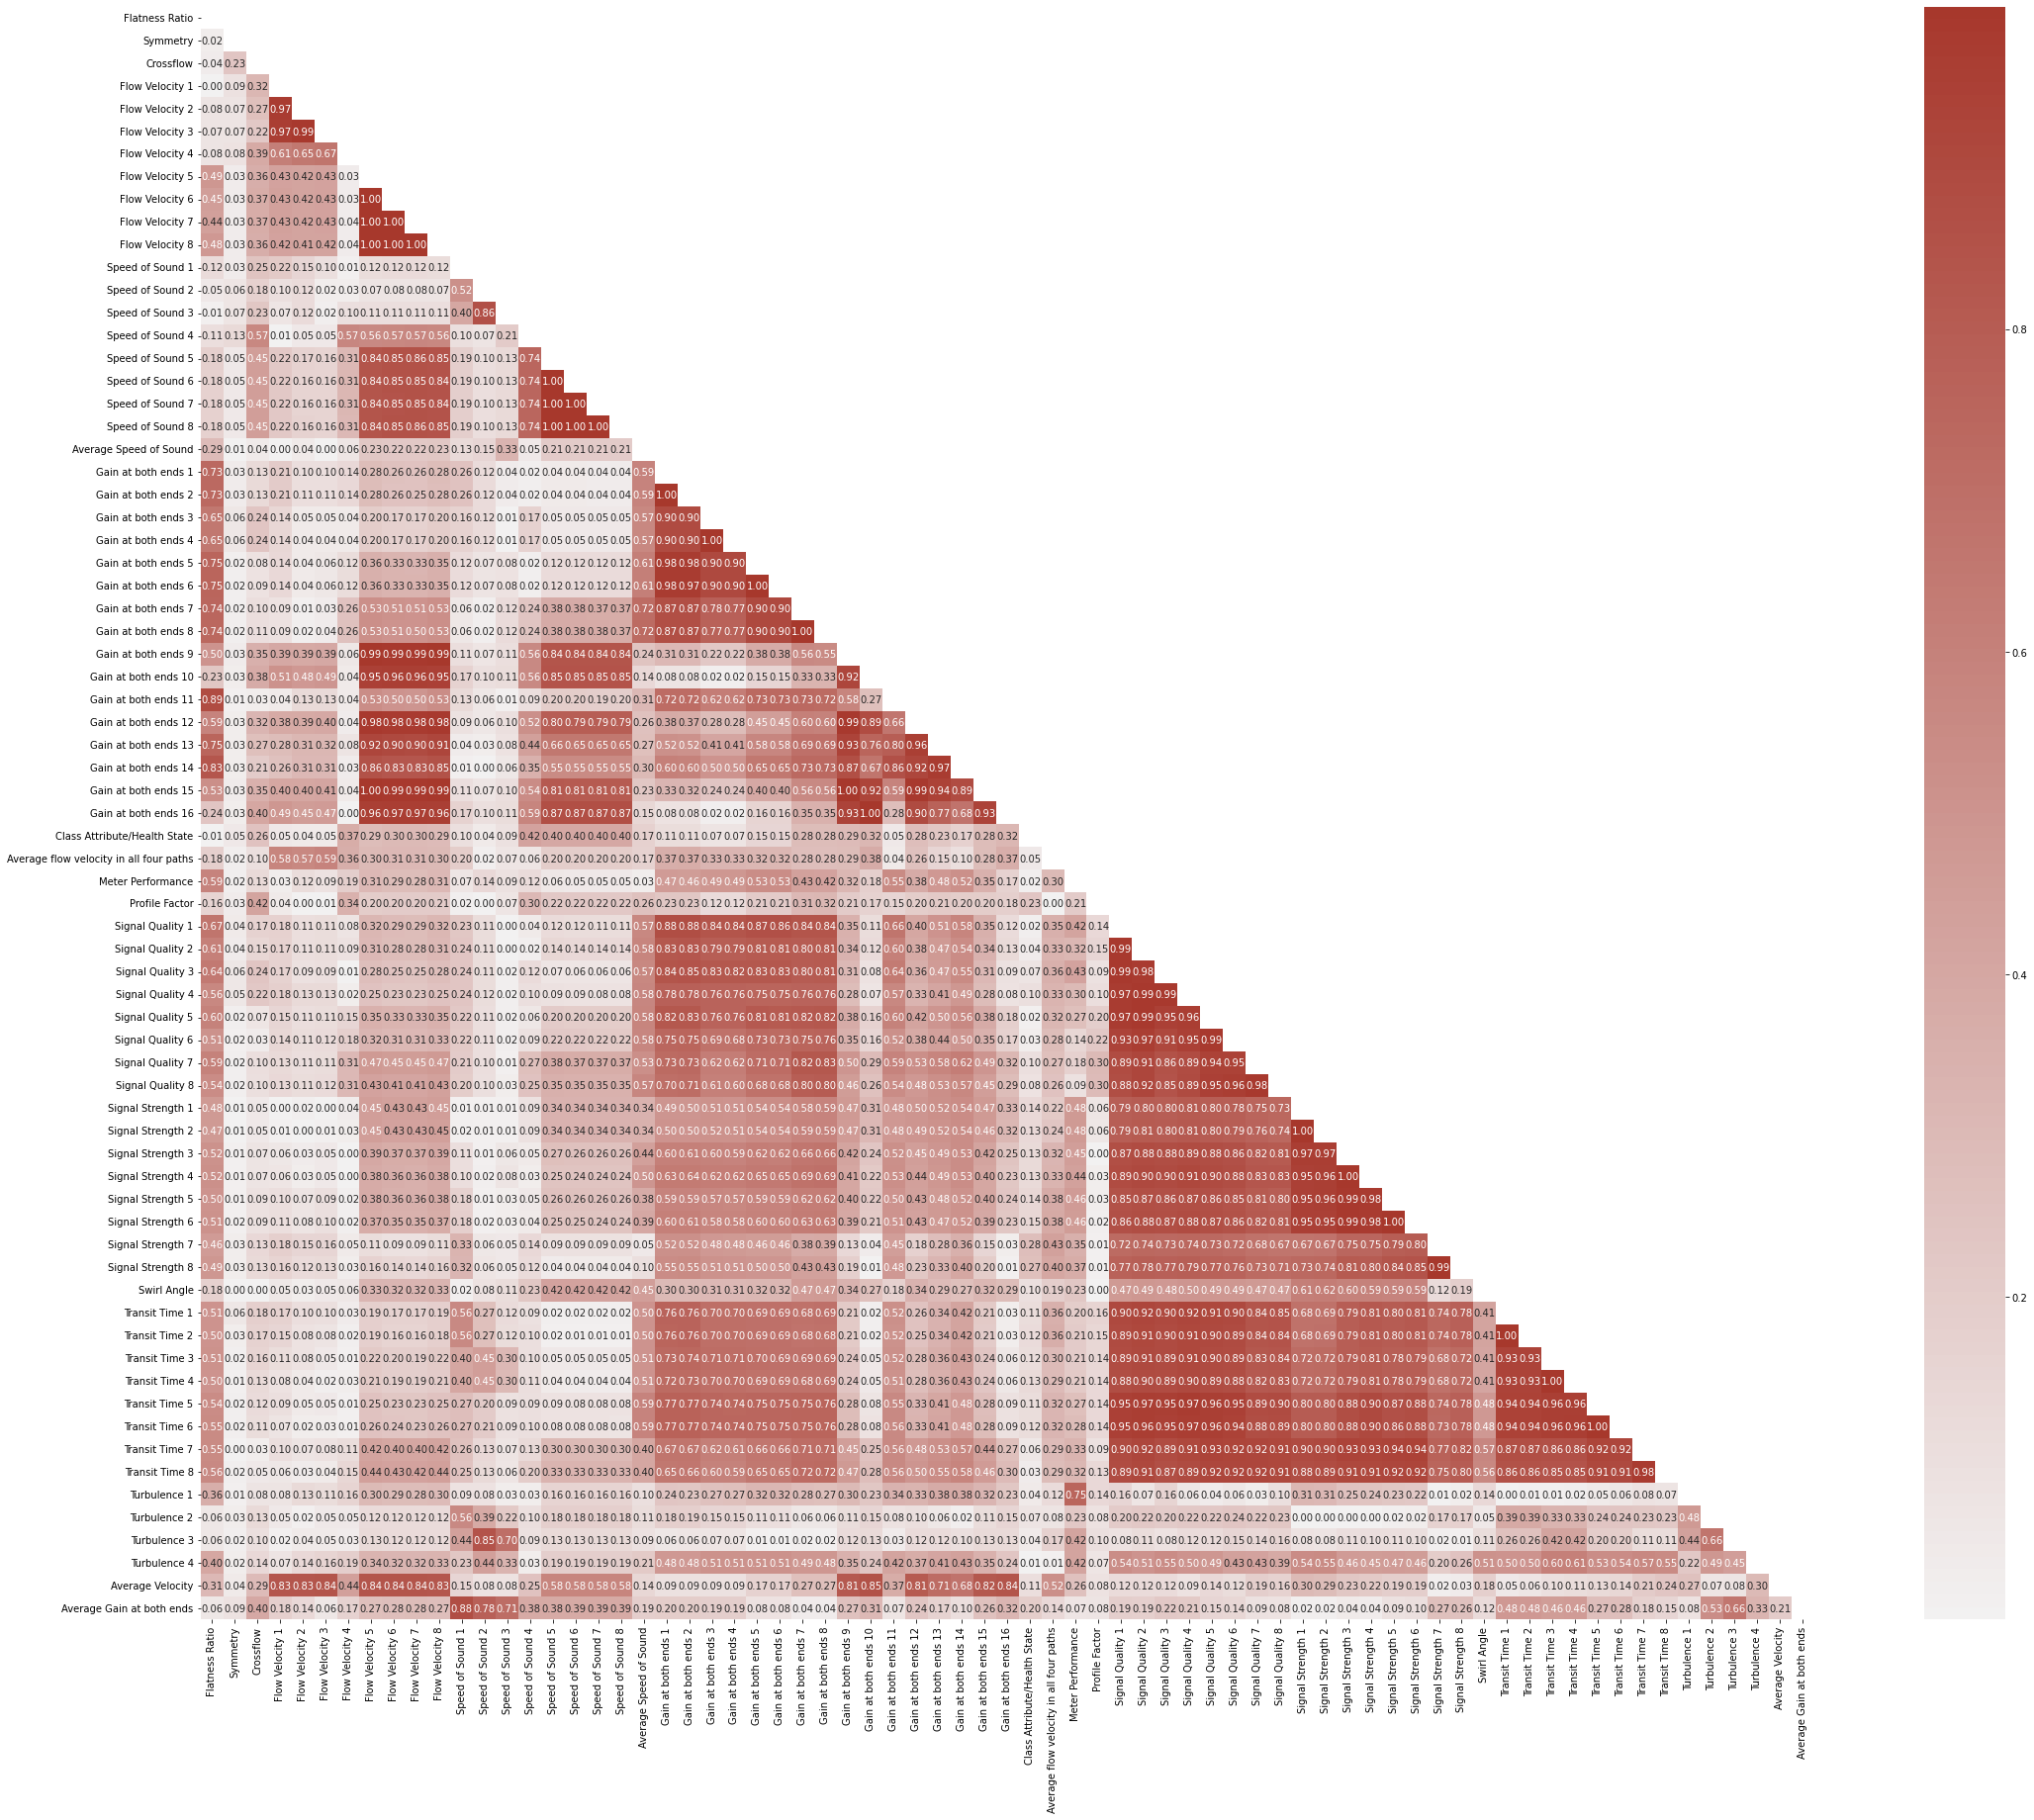

In [50]:
plt.figure(figsize=(40,30))

# Create a mask
mask = np.triu(np.ones_like(full_corr_matrix, dtype=bool))

sns.heatmap(full_corr_matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

reduced_full_corr_matrix = full_corr_matrix.mask(mask)

Set a threshold to drop the columns that has strong correlations, and get the list of columns to be dropped

In [53]:
to_drop = [c for c in reduced_full_corr_matrix.columns if any(reduced_full_corr_matrix[c] > 0.90)]
print(len(to_drop), 'rows to be dropped')
to_drop


42 rows to be dropped


['Flow Velocity 1',
 'Flow Velocity 2',
 'Flow Velocity 5',
 'Flow Velocity 6',
 'Flow Velocity 7',
 'Flow Velocity 8',
 'Speed of Sound 5',
 'Speed of Sound 6',
 'Speed of Sound 7',
 'Gain at both ends 1',
 'Gain at both ends 2',
 'Gain at both ends 3',
 'Gain at both ends 5',
 'Gain at both ends 6',
 'Gain at both ends 7',
 'Gain at both ends 9',
 'Gain at both ends 10',
 'Gain at both ends 12',
 'Gain at both ends 13',
 'Gain at both ends 15',
 'Signal Quality 1',
 'Signal Quality 2',
 'Signal Quality 3',
 'Signal Quality 4',
 'Signal Quality 5',
 'Signal Quality 6',
 'Signal Quality 7',
 'Signal Quality 8',
 'Signal Strength 1',
 'Signal Strength 2',
 'Signal Strength 3',
 'Signal Strength 4',
 'Signal Strength 5',
 'Signal Strength 6',
 'Signal Strength 7',
 'Transit Time 1',
 'Transit Time 2',
 'Transit Time 3',
 'Transit Time 4',
 'Transit Time 5',
 'Transit Time 6',
 'Transit Time 7']

Drop the selected columns, resulting a dataset with redundant features eliminated

In [54]:
full_df_reduced = full_df_replaced.drop(to_drop, axis=1)
full_df_reduced

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 3,Flow Velocity 4,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 8,...,Profile Factor,Signal Strength 8,Swirl Angle,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Average Velocity,Average Gain at both ends
0,0.841499,1.009367,0.993816,10.037759,8.501365,1485.528500,1485.454000,1485.437500,1485.354167,1485.508667,...,1.096966,66.722222,0.041667,123.963333,11.830806,5.142611,5.030472,12.831889,9.350917,1485.391229
1,0.842250,1.006584,0.996605,8.951618,7.612213,1486.042333,1485.992833,1485.973333,1485.867833,1486.033667,...,1.096966,66.722222,0.041667,123.963333,11.830806,5.142611,5.030472,12.831889,8.323063,1485.919896
2,0.840723,1.011647,0.998152,7.857692,6.593117,1486.023667,1485.980833,1485.960000,1485.850500,1486.012333,...,1.096966,66.722222,0.041667,123.963333,11.830806,5.142611,5.030472,12.831889,7.273721,1485.903146
3,0.841119,1.017807,0.996812,6.689885,5.615428,1484.898000,1484.872000,1484.852333,1484.739000,1484.900333,...,1.096966,66.722222,0.111100,123.963333,11.582833,4.994306,4.871361,12.114583,6.214215,1484.790937
4,0.840358,1.016534,0.996221,6.675628,5.623977,1484.361333,1484.331833,1484.313833,1484.205000,1484.364000,...,1.096966,66.722222,0.111100,123.963333,11.582833,4.994306,4.871361,12.114583,6.209143,1484.252875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.102778,-0.254722,1513.505556,1507.080556,1494.355556,1567.686111,1487.715250,...,4.593220,55.000000,0.209683,117.880278,28.922333,6.204250,6.451889,6.485695,3.847854,1504.110181
355,0.819070,0.214250,0.098034,-0.103889,-2.706944,1521.897222,1474.400000,1500.705556,1555.538889,1487.715250,...,0.173768,55.000000,0.209683,118.631111,28.922333,6.204250,6.451889,6.485695,3.696222,1500.349417
356,0.819070,0.115593,0.134579,-0.098889,-2.772778,1518.072222,1439.802778,1512.719444,1554.647222,1487.715250,...,0.049027,55.000000,0.209683,118.807500,28.922333,6.204250,6.451889,6.485695,3.722403,1496.936917
357,0.812122,0.099441,0.143832,0.029444,-2.613333,1487.083333,1422.211111,1484.836111,1552.894444,1484.557667,...,-0.053056,55.000000,0.209683,118.872778,28.922333,6.204250,6.451889,6.485695,0.668806,1485.577531


Apply feature elimination to Meter B and Meter D datasets

### Meter B
Contains 92 instances of diagnostic parameters for a 4-path liquid USM. It has 52 attributes (features) and 3 classes: \
(1) -- Profile factor \
(2) -- Symmetry \
(3) -- Crossflow \
(4) -- Swirl angle \
(5)-(8) -- Flow velocity in each of the four paths \
(9) -- Average flow velocity in all four paths \
(10)-(13) -- Speed of sound in each of the four paths \
(14) -- Average speed of sound in all four paths \
(15)-(22) -- Signal strength at both ends of each of the four paths \
(23)-(26) -- Turbulence in each of the four paths \
(27) -- Meter performance \
(28)-(35) -- Signal quality at both ends of each of the four paths \
(36)-(43) -- Gain at both ends of each of the four paths \
(44)-51 -- Transit time at both ends of each of the four paths \
(52) -- Class attribute or health state of meter: 1,2,3 \

In [ ]:
meter_b_df = pd.read_csv("./dataset/Meter B", sep="\t", header=None)
meter_b_headers = [
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Swirl Angle',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Average flow velocity in all four paths',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Average Speed of Sound',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Turbulence 1',
    'Turbulence 2',
    'Turbulence 3',
    'Turbulence 4',
    'Meter Performance',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class Attribute/Health State'
]
meter_b_df.columns = meter_b_headers
meter_b_df_x = meter_b_df.drop(meter_b_df.columns[51], axis=1, inplace=False)
meter_b_df_y = meter_b_df[['Class Attribute/Health State']].copy()
# meter_b_df_x
# meter_b_df_y
# meter_b_df
meter_b_df

,Profile Factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average flow velocity in all four paths,Speed of Sound 1,...,Gain at both ends 8,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class Attribute/Health State
0,1.185089,1.028128,1.016478,0.1500,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,...,49.800000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,1
1,1.191806,1.033750,1.019411,0.2170,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,...,49.800000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,1
2,1.181983,1.028089,1.020994,0.0889,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,...,49.800000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,1
3,1.182761,1.028783,1.021072,0.1170,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,...,49.800000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,1
4,1.182272,1.028922,1.021350,0.0222,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,...,49.800000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2.418111,0.000000,0.000000,0.0000,5.332300,6.662456,6.288444,0.000000,5.922272,1550.598167,...,96.462778,80.552229,80.323852,118.229294,117.738550,118.007206,117.542750,0.000000,0.000000,3
88,3.290425,0.000000,0.000000,0.0000,5.420572,6.653589,6.309761,0.000000,5.924100,1542.063444,...,96.534444,80.101938,79.872679,118.229300,117.738861,118.005594,117.539489,0.000000,0.000000,3
89,2.601044,0.000000,0.000000,0.0000,5.256956,6.672083,6.287644,0.000000,5.916767,1550.688444,...,96.653889,80.544970,80.321946,118.227667,117.736100,118.002017,117.538133,0.000000,0.000000,3
90,2.336800,0.000000,0.000000,0.0000,5.222706,6.669056,6.288772,0.000000,5.895378,1550.800889,...,96.612778,80.538187,80.317351,118.223733,117.732389,117.997167,117.532778,0.000000,0.000000,3


Get correlation matrix

In [ ]:
meter_b_corr_matrix = meter_b_df_x.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(meter_b_corr_matrix, dtype=bool))

# plt.figure(figsize=(50,40))
# sns.heatmap(meter_b_corr_matrix, mask=mask, center=0, annot=True,
#              fmt='.2f', square=True, cmap=cmap)

reduced_meter_b_matrix = meter_b_corr_matrix.mask(mask)

Filter rows to be dropped

In [ ]:
to_drop = [c for c in reduced_meter_b_matrix.columns if any(reduced_meter_b_matrix[c] > 0.95)]
print(len(to_drop), 'rows to be dropped')
meter_b_df_x_reduced = meter_b_df_x.drop(to_drop, axis=1)
meter_b_df_x_reduced

24 rows to be dropped


,Profile Factor,Crossflow,Swirl Angle,Flow Velocity 4,Average flow velocity in all four paths,Speed of Sound 3,Average Speed of Sound,Signal Strength 2,Signal Strength 4,Signal Strength 6,...,Signal Quality 4,Signal Quality 6,Gain at both ends 2,Gain at both ends 4,Gain at both ends 6,Gain at both ends 8,Transit Time 2,Transit Time 4,Transit Time 6,Transit Time 8
0,1.185089,1.016478,0.1500,2.087889,2.394439,1485.372056,1485.153222,5067.588889,4984.077778,5200.205556,...,100.000000,100.000000,52.500000,52.900000,50.700000,49.800000,84.003098,120.144244,120.179078,83.919971
1,1.191806,1.019411,0.2170,2.075706,2.396089,1485.250333,1485.030722,5065.400000,4981.433333,5200.816667,...,100.000000,100.000000,52.500000,52.900000,50.700000,49.800000,84.009973,120.153889,120.188800,83.927260
2,1.181983,1.020994,0.0889,3.079356,3.523517,1485.281000,1485.061111,5002.900000,4958.055556,5179.372222,...,100.000000,100.000000,52.500000,52.900000,50.700000,49.800000,83.983336,120.106206,120.140578,83.901593
3,1.182761,1.021072,0.1170,3.080400,3.525933,1485.350444,1485.131278,4994.794444,4956.305556,5175.688889,...,100.000000,100.000000,52.500000,52.900000,50.700000,49.800000,83.979407,120.100444,120.134933,83.897597
4,1.182272,1.021350,0.0222,3.080950,3.525128,1485.320500,1485.103278,4993.561111,4952.244444,5174.011111,...,100.000000,100.000000,52.500000,52.900000,50.700000,49.800000,83.980807,120.102800,120.137472,83.898959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2.418111,0.000000,0.0000,0.000000,5.922272,1516.918111,1527.452111,188.576672,2372.372333,824.413989,...,91.250000,93.038889,87.543889,79.873333,82.130556,96.462778,80.323852,117.738550,117.542750,0.000000
88,3.290425,0.000000,0.0000,0.000000,5.924100,1516.951389,1527.424278,197.298350,2354.717556,843.762544,...,90.622222,92.272222,87.433889,79.853889,82.328889,96.534444,79.872679,117.738861,117.539489,0.000000
89,2.601044,0.000000,0.0000,0.000000,5.916767,1516.983444,1527.512111,195.321450,2468.318556,890.856056,...,90.911111,93.772222,87.498889,79.758889,82.000000,96.653889,80.321946,117.736100,117.538133,0.000000
90,2.336800,0.000000,0.0000,0.000000,5.895378,1517.048222,1527.587444,192.998272,2498.801944,961.489406,...,91.516667,94.450000,87.381111,79.833333,82.000000,96.612778,80.317351,117.732389,117.532778,0.000000


### Meter D
Contains 180 instances of diagnostic parameters for a 4-path liquid USM. It has 44 attributes(features) and 4 classes: \
(1) -- Profile factor \
(2) -- Symmetry \
(3) -- Crossflow \
(4)-(7) -- Flow velocity in each of the four paths \
(8)-(11) -- Speed of sound in each of the four paths \
(12)-(19) -- Signal strength at both ends of each of the four paths \
(20)-(27) -- Signal quality at both ends of each of the four paths \
(28)-(35) -- Gain at both ends of each of the four paths \
(36)-(43) -- Transit time at both ends of each of the four paths \
(44) -- Class attribute or health state of meter: 1,2,3,4 \

In [ ]:
meter_d_df = pd.read_csv("./dataset/Meter D", sep="\t", header=None)
meter_d_headers=[
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class Attribute/Health State'
]
meter_d_df.columns = meter_d_headers
meter_d_df_x = meter_d_df.drop(meter_d_df.columns[36], axis=1, inplace=False)
meter_d_df_y = meter_d_df[['Class Attribute/Health State']].copy()
# meter_d_df_x
# meter_d_df_y
meter_d_df


,Profile Factor,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,...,Gain at both ends 8,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class Attribute/Health State
0,1.104706,1.004679,0.994783,2.345833,2.604444,2.580000,2.347222,1485.805556,1485.930556,1485.941667,...,-0.700000,124.150000,123.911944,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,1
1,1.089401,0.997778,0.998012,3.399444,3.711111,3.711944,3.414444,1486.163889,1486.302778,1486.302778,...,-0.700000,124.171944,123.831667,151.652222,151.164444,151.595278,151.113333,124.274167,123.937778,1
2,1.079671,1.006056,0.999027,3.438056,3.714722,3.689722,3.420000,1486.322222,1486.452778,1486.455556,...,-0.700000,124.160000,123.818056,151.636111,151.150833,151.580000,151.096944,124.260833,123.923611,1
3,1.090834,1.013194,0.994911,3.399444,3.725000,3.660556,3.371111,1486.455556,1486.575000,1486.583333,...,-0.700000,124.144722,123.808611,151.622500,151.139167,151.564167,151.084167,124.250833,123.913056,1
4,1.093816,1.009716,1.003622,3.398889,3.702778,3.681389,3.351944,1486.600000,1486.725000,1486.730556,...,-0.700000,124.134444,123.797500,151.607500,151.122778,151.550278,151.068889,124.236111,123.903056,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.593220,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,1513.505556,1507.080556,1494.355556,...,44.600000,121.266111,122.244167,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,4
176,0.173768,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,1521.897222,1474.400000,1500.705556,...,44.600000,121.082222,121.059167,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,4
177,0.049027,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,1518.072222,1439.802778,1512.719444,...,44.169444,121.298889,121.370278,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,4
178,-0.053056,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1487.083333,1422.211111,1484.836111,...,44.100000,125.552500,122.318333,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,4


Get correlation matrix

In [ ]:
meter_d_corr_matrix = meter_d_df_x.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(meter_d_corr_matrix, dtype=bool))

# plt.figure(figsize=(50,40))
# sns.heatmap(meter_d_corr_matrix, mask=mask, center=0, annot=True,
#              fmt='.2f', square=True, cmap=cmap)

reduced_meter_d_matrix = meter_d_corr_matrix.mask(mask)

Filter rows to be dropped

In [ ]:
to_drop = [c for c in reduced_meter_d_matrix.columns if any(reduced_meter_d_matrix[c] > 0.95)]
print(len(to_drop), 'rows to be dropped')
meter_d_df_x_reduced = meter_d_df_x.drop(to_drop, axis=1)
meter_d_df_x_reduced

16 rows to be dropped


,Profile Factor,Symmetry,Crossflow,Flow Velocity 3,Flow Velocity 4,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Signal Strength 2,...,Gain at both ends 6,Gain at both ends 8,Transit Time 1,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class Attribute/Health State
0,1.104706,1.004679,0.994783,2.580000,2.347222,1485.805556,1485.930556,1485.941667,1485.780556,66.0,...,1.4,-0.700000,124.150000,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,1
1,1.089401,0.997778,0.998012,3.711944,3.414444,1486.163889,1486.302778,1486.302778,1486.130556,66.0,...,1.4,-0.700000,124.171944,151.652222,151.164444,151.595278,151.113333,124.274167,123.937778,1
2,1.079671,1.006056,0.999027,3.689722,3.420000,1486.322222,1486.452778,1486.455556,1486.297222,66.0,...,1.4,-0.700000,124.160000,151.636111,151.150833,151.580000,151.096944,124.260833,123.923611,1
3,1.090834,1.013194,0.994911,3.660556,3.371111,1486.455556,1486.575000,1486.583333,1486.416667,66.0,...,1.4,-0.700000,124.144722,151.622500,151.139167,151.564167,151.084167,124.250833,123.913056,1
4,1.093816,1.009716,1.003622,3.681389,3.351944,1486.600000,1486.725000,1486.730556,1486.555556,66.0,...,1.4,-0.700000,124.134444,151.607500,151.122778,151.550278,151.068889,124.236111,123.903056,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.593220,5.153846,0.123245,-0.102778,-0.254722,1513.505556,1507.080556,1494.355556,1567.686111,55.0,...,44.8,44.600000,121.266111,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,4
176,0.173768,0.214250,0.098034,-0.103889,-2.706944,1521.897222,1474.400000,1500.705556,1555.538889,55.0,...,44.8,44.600000,121.082222,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,4
177,0.049027,0.115593,0.134579,-0.098889,-2.772778,1518.072222,1439.802778,1512.719444,1554.647222,55.0,...,44.8,44.169444,121.298889,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,4
178,-0.053056,0.099441,0.143832,0.029444,-2.613333,1487.083333,1422.211111,1484.836111,1552.894444,55.0,...,44.8,44.100000,125.552500,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,4


#### Filtering and retriving subset of common columns

In [ ]:
# common_cols = np.intersect1d(np.intersect1d(meter_a_df_x_reduced.columns, meter_b_df_x_reduced.columns), meter_d_df_x_reduced.columns)
a_b_common = np.intersect1d(meter_a_df_x_reduced.columns, meter_b_df_x_reduced.columns)
a_b_common

array(['Average Speed of Sound', 'Crossflow', 'Gain at both ends 2'],
      dtype=object)

# PCA

### PCA for Meter A

In [ ]:
meter_a_x = meter_a_df_x_reduced.to_numpy()
meter_a_y = meter_a_df_y.to_numpy()
meter_a_y = np.reshape(meter_a_y, -1)
print(meter_a_x.shape)
print(meter_a_y.shape)

(87, 12)
(87,)


[7.51388315e-01 7.97268160e-02 5.56954554e-03 2.58710754e-04
 2.12391480e-04 1.74690813e-04 1.43261245e-04 8.73935149e-05
 4.73704808e-05 3.27736994e-05 1.85962097e-05 2.07805491e-06]
0.8376619432895066
[8.97006628e-01 9.51777941e-02 6.64891796e-03 3.08848642e-04
 2.53552739e-04 2.08545719e-04 1.71025133e-04 1.04330292e-04
 5.65508332e-05 3.91252099e-05 2.22001368e-05 2.48077990e-06]
12
Captured eigen varience energy for PC1, PC2, and PC3: 0.9988333405148558


Text(0, 0.5, 'cumulative explained variance')

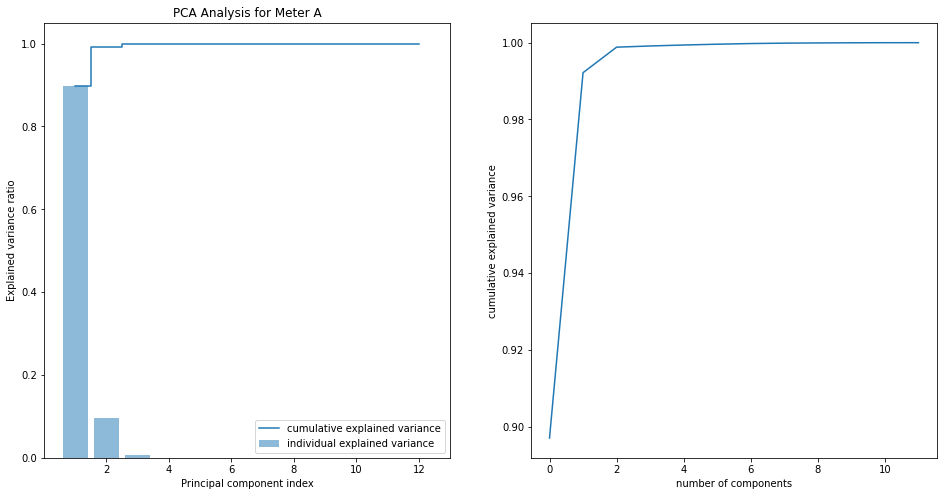

In [ ]:
from sklearn.decomposition import PCA

pca_all = PCA()
pca_all.fit(meter_a_x)
tot = sum(pca_all.explained_variance_)
print(pca_all.explained_variance_)
print(tot)
# var_exp = [(i / tot) for i in sorted(pca_all.explained_variance_, reverse=True)]
var_exp = pca_all.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(len(var_exp))
print('Captured eigen varience energy for PC1, PC2, and PC3:', sum(var_exp[:3]))
# plot explained variances
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.bar(range(1, meter_a_x.shape[1]+1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
ax1.step(range(1,meter_a_x.shape[1]+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
ax1.set_ylabel('Explained variance ratio')
ax1.set_xlabel('Principal component index')
ax1.set_title('PCA Analysis for Meter A')
ax1.legend(loc='best')
ax2.plot(np.cumsum(pca_all.explained_variance_ratio_))
ax2.set_xlabel('number of components')
ax2.set_ylabel('cumulative explained variance')

From the above graphs, we see that PC1, PC2, and PC3 captures 99.8% of the variation of data, which is sufficient for representation. Therefore, only 3 PCS are needed.

In [ ]:
pca_3 = PCA(n_components=3)
pca_3.fit(meter_a_x)
meter_a_x_pca=pca_3.transform(meter_a_x)
# print(meter_a_x_pca_2)
print(meter_a_x_pca.shape) #only 2 PC used

(87, 3)


### PCA for Meter B

In [ ]:
meter_b_x = meter_b_df_x_reduced.to_numpy()
meter_b_y = meter_b_df_y.to_numpy()
meter_b_y = np.reshape(meter_b_y, -1)
print(meter_b_x.shape)
print(meter_b_y.shape)

(92, 27)
(92,)


[8.35562675e+06 2.55920868e+06 3.96296011e+05 1.30684171e+05
 1.94825677e+03 3.35929967e+02 1.71210808e+02 6.96138993e+01
 3.63159248e+01 2.45304223e+01 1.85812677e+01 1.55087384e+01
 7.29790452e+00 4.91856396e+00 4.24202361e+00 2.62493533e+00
 2.41026929e+00 1.74923432e+00 9.73128730e-01 5.68498115e-01
 4.04508579e-01 3.17382004e-01 2.32939965e-01 5.93740841e-02
 3.52017276e-02 1.32727926e-02 2.95905342e-03]
11444461.413555939
[7.30102226e-01 2.23619844e-01 3.46277554e-02 1.14189883e-02
 1.70235776e-04 2.93530604e-05 1.49601455e-05 6.08275888e-06
 3.17323144e-06 2.14343178e-06 1.62360351e-06 1.35513047e-06
 6.37680032e-07 4.29776796e-07 3.70661708e-07 2.29362941e-07
 2.10605742e-07 1.52845491e-07 8.50305396e-08 4.96745189e-08
 3.53453574e-08 2.77323670e-08 2.03539473e-08 5.18801907e-09
 3.07587455e-09 1.15975686e-09 2.58557683e-10]
27
Captured eigen varience energy for PC1, PC2, PC3, and PC4: 0.9997688141103991


Text(0, 0.5, 'cumulative explained variance')

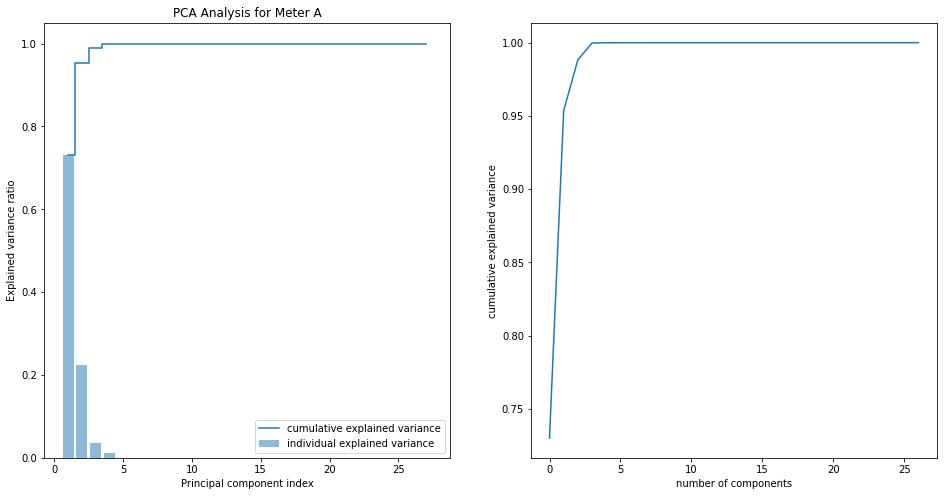

In [ ]:
pca_all = PCA()
pca_all.fit(meter_b_x)
tot = sum(pca_all.explained_variance_)
print(pca_all.explained_variance_)
print(tot)
# var_exp = [(i / tot) for i in sorted(pca_all.explained_variance_, reverse=True)]
var_exp = pca_all.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(len(var_exp))
print('Captured eigen varience energy for PC1, PC2, PC3, and PC4:', sum(var_exp[:4]))
# plot explained variances
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.bar(range(1, meter_b_x.shape[1]+1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
ax1.step(range(1,meter_b_x.shape[1]+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
ax1.set_ylabel('Explained variance ratio')
ax1.set_xlabel('Principal component index')
ax1.set_title('PCA Analysis for Meter A')
ax1.legend(loc='best')
ax2.plot(np.cumsum(pca_all.explained_variance_ratio_))
ax2.set_xlabel('number of components')
ax2.set_ylabel('cumulative explained variance')

From the above graphs, we see that PC1, PC2, PC3, and PC4 together captures 99.9% of the variation of data, which is sufficient for representation. Therefore, only 4 PCS are needed.